In [1]:
# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset

In [4]:
glass = pd.read_csv("D:\Data science\Assignments docs\KNN\glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.shape

(214, 10)

In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Exploratory Data Analysis

In [8]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

### Checking missing values

In [9]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### There are no missing values in the dataset

### Univariate analysis

In [10]:
gls_features = glass.columns

In [11]:
gls_features

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

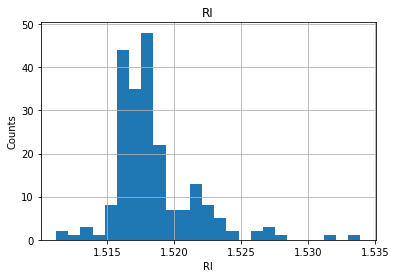

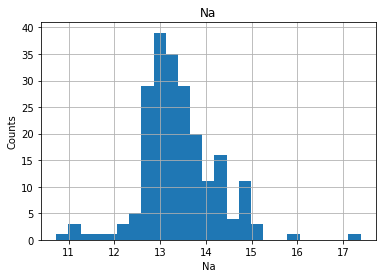

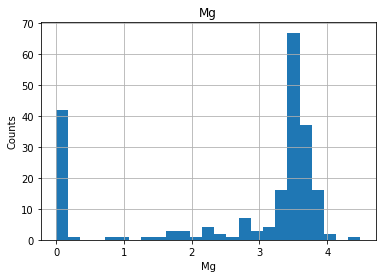

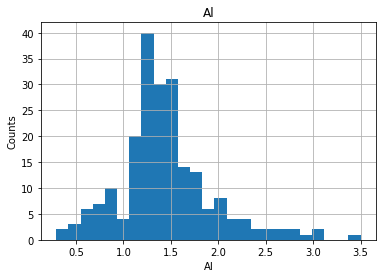

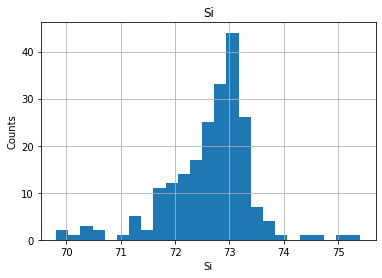

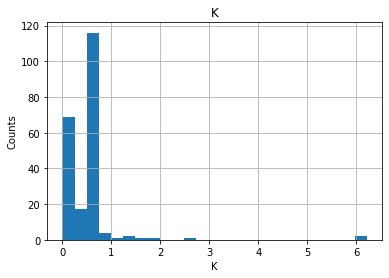

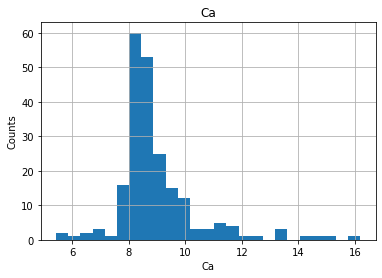

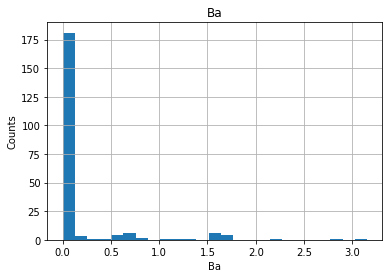

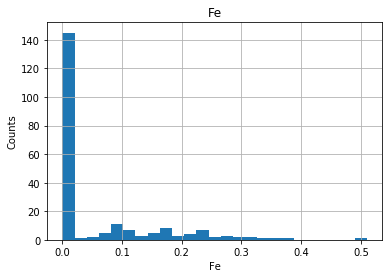

In [12]:
for feature in gls_features:
    if feature != "Type":
        glass[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Counts")
        plt.title(feature)
        plt.show()

In [13]:
# Countplot for output variable

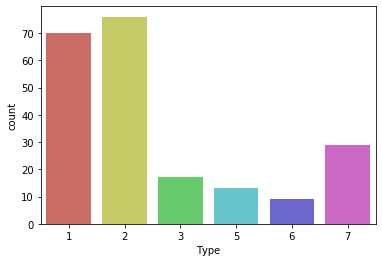

In [14]:
sns.countplot("Type", data=glass, palette="hls")

#### It can be observed that the type 1 and type 2 glasses have higher frequency compared to other types. There is no value for glass of type 4

In [15]:
# Checking the skewness of each variable

In [16]:
glass.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [17]:
# Seperating input and output variables

In [18]:
X = glass.drop(columns="Type")
y = glass["Type"]

## Feature scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X)

MinMaxScaler()

In [22]:
scaled_data = pd.DataFrame(scaler.transform(X), columns=X.columns )

In [23]:
scaled_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [24]:
# Redefining X value

In [25]:
X = scaled_data

In [26]:
# Splitting the data into train and test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [29]:
x_train.shape

(171, 9)

In [30]:
x_test.shape

(43, 9)

## Model building

In [31]:
from sklearn.neighbors import KNeighborsClassifier as KNC

### Assuming k = 3 initially

In [32]:
neigh = KNC(n_neighbors = 3)

In [33]:
model = neigh.fit(x_train, y_train)

In [34]:
# Predictions

In [35]:
pred_train = model.predict(x_train)        # for training

In [36]:
pred_test = model.predict(x_test)          # for testing

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
# Confusion matrix

In [39]:
confusion_matrix(y_train,pred_train)      # for training

array([[45,  7,  1,  0,  0,  0],
       [ 9, 46,  2,  2,  0,  0],
       [ 7,  2,  6,  0,  0,  0],
       [ 0,  2,  0,  8,  0,  1],
       [ 0,  1,  0,  0,  6,  0],
       [ 1,  1,  0,  0,  1, 23]], dtype=int64)

In [40]:
confusion_matrix(y_test,pred_test)      # for testing

array([[16,  1,  0,  0,  0,  0],
       [ 4,  8,  0,  4,  1,  0],
       [ 1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  1,  2]], dtype=int64)

In [41]:
# model accuracy 

In [42]:
acc_train = accuracy_score(y_train,pred_train)         # for training
acc_train

0.783625730994152

In [43]:
acc_test = accuracy_score(y_test,pred_test)         # for testing
acc_test

0.6976744186046512

### Trying the value k =5

In [44]:
neigh = KNC(n_neighbors = 5)

In [45]:
model = neigh.fit(x_train, y_train)

In [46]:
# Predictions

In [47]:
pred_train = model.predict(x_train)        # for training

In [48]:
pred_test = model.predict(x_test)          # for testing

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [50]:
# Confusion matrix

In [51]:
confusion_matrix(y_train,pred_train)      # for training

array([[48,  4,  1,  0,  0,  0],
       [17, 39,  0,  3,  0,  0],
       [ 9,  3,  3,  0,  0,  0],
       [ 0,  2,  0,  6,  0,  3],
       [ 0,  2,  0,  1,  4,  0],
       [ 1,  1,  0,  1,  1, 22]], dtype=int64)

In [52]:
confusion_matrix(y_test,pred_test)      # for testing

array([[17,  0,  0,  0,  0,  0],
       [ 7,  5,  0,  4,  1,  0],
       [ 1,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  2]], dtype=int64)

In [53]:
# model accuracy 

In [54]:
acc_train = accuracy_score(y_train,pred_train)         # for training
acc_train

0.7134502923976608

In [55]:
acc_test = accuracy_score(y_test,pred_test)         # for testing
acc_test

0.6046511627906976

### Checking the accuracy of the model for different value of k

In [56]:
acc=[]
for i in range(3,20,2):
    neigh=KNC(n_neighbors=i)
    model = neigh.fit(x_train, y_train)
    pred_train=model.predict(x_train)
    pred_test=model.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc=accuracy_score(y_test,pred_test)
    acc.append([train_acc, test_acc])

In [57]:
# Plotting accuracy of the model considering k values from 3 to 20

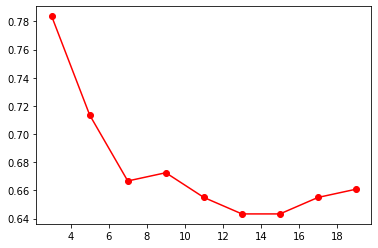

In [58]:
plt.plot(np.arange(3,20,2), [i[0] for i in acc],"ro-")

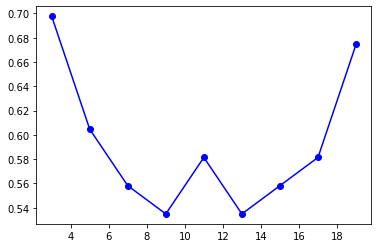

In [59]:
plt.plot(np.arange(3,20,2), [i[1] for i in acc], "bo-")

#### From the above two graphs it is evident that the maximum accuracy is obtained for the value k=3

In [60]:
# Accuracy of the KNN model for k =3

In [61]:
acc_train = accuracy_score(y_train,pred_train)         # for training
acc_train

0.6608187134502924

In [62]:
acc_test = accuracy_score(y_test,pred_test)         # for testing
acc_test

0.6744186046511628